In [1]:
import pandas as pd

In [36]:
# Specify the path to your CSV file
csv_file = "/Users/ricardo/Desktop/Ricardo's Simulator/Simulator/SmallGridData/SmallGrid_Requests.csv"
req_df = pd.read_csv(csv_file)
req_Oid = req_df['Oid']
req_Did = req_df['Did']

In [37]:
def mapping_node_to_coordinate(node_id):
        map_width = 1000 #adjust as needed
        video_width = 1000 #adjust as needed
        scale_factor = video_width / map_width
        return (int(node_id % 10 * scale_factor), int(node_id // 10 * scale_factor))

In [38]:
req_Oid_map = req_Oid.apply(lambda x: mapping_node_to_coordinate(x))
req_Did_map = req_Did.apply(lambda x: mapping_node_to_coordinate(x))
req_Oid_map


0      (0, 2)
1      (1, 5)
2      (9, 1)
3      (2, 9)
4      (8, 5)
        ...  
475    (0, 5)
476    (8, 7)
477    (2, 3)
478    (8, 9)
479    (0, 3)
Name: Oid, Length: 480, dtype: object

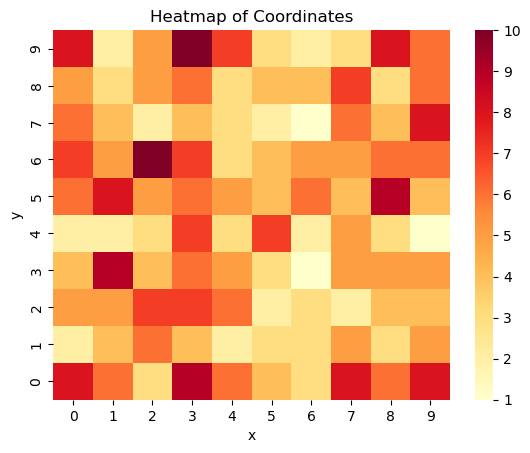

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the coordinates to separate x and y columns
req_Oid_map_x = req_Oid_map.apply(lambda x: x[0])
req_Oid_map_y = req_Oid_map.apply(lambda x: x[1])

# Create a dataframe with the coordinates
heatmap_data = pd.DataFrame({'x': req_Oid_map_x, 'y': req_Oid_map_y})

# Create a pivot table to prepare the data for the heatmap
heatmap_data = heatmap_data.pivot_table(index='y', columns='x', aggfunc=len, fill_value=0)

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.gca().invert_yaxis()
plt.title('Heatmap of Coordinates')
plt.show()
